# **Aprendizagem de Máquina**

## **IMPORTS**

In [12]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

## **Aula 1:** Introdução

In [ ]:
# Carregando a base de dados
X, y = load_digits(return_X_y=True)

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [ ]:
# Treinamento de avaliação via Holdout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y) # stratify serve para respeitar a ordem de classes

# Declarando o modelo (classificador)
clf = KNeighborsClassifier(n_neighbors=3)

# Treinamento do modelo
clf = clf.fit(X_train, y_train) # Entrar apenas com parametros de treinamento

# Avaliação usando a base de teste
score = clf.score(X_test, y_test) # Entrar apenas com parametros de teste

# Predição de modelos
predicted = clf.predict(X_test) # Entrar apenas com parametros de teste

# Calcula a matriz de confusão
matrix = confusion_matrix(y_test, predicted)

print("Accuracy = %.5f" %score)

Accuracy = 0.98704


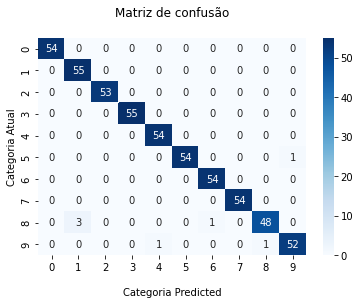

In [ ]:
ax = sns.heatmap(matrix, annot=True, cmap='Blues')

ax.set_title('Matriz de confusão\n');
ax.set_xlabel('\nCategoria Predicted')
ax.set_ylabel('Categoria Atual');

plt.show()

## **Aula 2:** KNN (K-Nearest Neighbors)


### Holdout

In [ ]:
X, y = load_digits(return_X_y=True)
print("Formato de X: ", X.shape)
print("Formato de y: ", y.shape)

Formato de X:  (1797, 64)
Formato de y:  (1797,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Formato de X_train: ", X_train.shape)
print("Formato de y_train: ", y_train.shape)
print("Formato de X_test: ", X_test.shape)
print("Formato de y_test: ", y_test.shape)

Formato de X_train:  (1257, 64)
Formato de y_train:  (1257,)
Formato de X_test:  (540, 64)
Formato de y_test:  (540,)


In [ ]:
knn_hold = KNeighborsClassifier(n_neighbors=3, weights='uniform', 
                           algorithm='ball_tree', leaf_size=30, metric_params=None, n_jobs=None)

knn_hold = knn_hold.fit(X_train, y_train)

Accuracy = 98.704 
Precision = 0.987 
Recall = 0.987 
F1 = 0.987 
Primeira instância na base de teste foi considerada como da classe: 1
Probabilidade de cada classe para a primeira instância:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


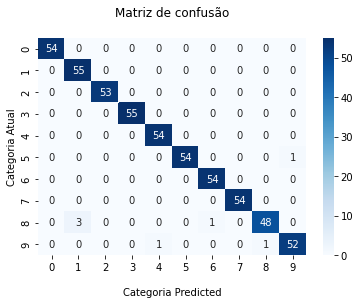

In [ ]:
y_pred=knn_hold.predict(X_test)

predicted_proba=knn_hold.predict_proba(X_test)

score=knn_hold.score(X_test, y_test)
print("Accuracy = %.3f " % (score*100))

precision=precision_score(y_test, y_pred, average='weighted')
print("Precision = %.3f " % precision)

recall=recall_score(y_test, y_pred, average='weighted')
print("Recall = %.3f " % recall)

f1=f1_score(y_test, y_pred, average='weighted')
print("F1 = %.3f " % f1)

print("Primeira instância na base de teste foi considerada como da classe: %d" % y_pred[0])

print("Probabilidade de cada classe para a primeira instância: ", predicted_proba[0])

knn_hold_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(knn_hold_matrix, annot=True, cmap='Blues')

ax.set_title('Matriz de confusão\n');
ax.set_xlabel('\nCategoria Predicted')
ax.set_ylabel('Categoria Atual');

plt.show()

### T-Fold Cross Validation

In [ ]:
X, y = load_digits(return_X_y=True)
print("Formato de X: ", X.shape)
print("Formato de y: ", y.shape)

Formato de X:  (1797, 64)
Formato de y:  (1797,)


In [ ]:
knn_tfold = KNeighborsClassifier(n_neighbors=5, weights='uniform', 
                           algorithm='ball_tree', leaf_size=30, metric_params=None, n_jobs=None)

T=10 # número de pastas ou folds
result = model_selection.cross_val_score(knn_tfold, X, y, cv=T)


Cross Validation Results 10 folds:
Mean Accuracy: 0.97107
Mean Std: 0.01717
Precision = 0.972 
Recall = 0.971 
F1 = 0.971 
Primeira instância na base de teste foi considerada como da classe: 0
Probabilidade de cada classe para a primeira instância:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


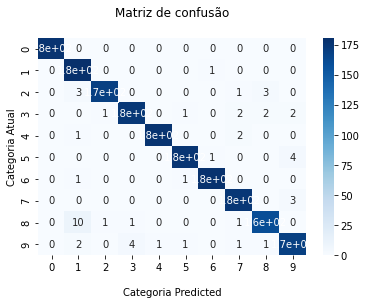

In [ ]:
print("\nCross Validation Results %d folds:" % T)
print("Mean Accuracy: %.5f" % result.mean())
print("Mean Std: %.5f" % result.std())

y_pred = model_selection.cross_val_predict(knn_tfold, X, y, cv=T)

predicted_proba=model_selection.cross_val_predict(knn_tfold, X, y, cv=T, method='predict_proba')

precision=precision_score(y, y_pred, average='weighted')
print("Precision = %.3f " % precision)

recall=recall_score(y, y_pred, average='weighted')
print("Recall = %.3f " % recall)

f1=f1_score(y, y_pred, average='weighted')
print("F1 = %.3f " % f1)

print("Primeira instância na base de teste foi considerada como da classe: %d" % y_pred[0])

print("Probabilidade de cada classe para a primeira instância: ", predicted_proba[0])

knn_tfold_matrix = confusion_matrix(y, y_pred)

ax = sns.heatmap(knn_tfold_matrix, annot=True, cmap='Blues')

ax.set_title('Matriz de confusão\n');
ax.set_xlabel('\nCategoria Predicted')
ax.set_ylabel('Categoria Atual');

from joblib import dump, load
with open("KNN.mod", 'wb') as fo:  
    dump(knn_tfold, fo)

## **Aula 3:** Naive Bayes

## **Aula 4:** Aprendizagem Supervisionada

### **Avaliação Formativa**

#### Questão 1

In [5]:
# import breast cancer database

In [13]:
X, y = load_breast_cancer(return_X_y=True)
print("Formato de X: ", X.shape)
print("Formato de y: ", y.shape)

Formato de X:  (569, 30)
Formato de y:  (569,)


In [ ]:
# Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', splitter='best', 
                             max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                             max_features=None, random_state=None, 
                             max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             class_weight=None, ccp_alpha=0.0)

t = 10
result = model_selection.cross_val_score(clf, X, y, cv=T)

In [ ]:
print("\nCross Validation Results %d folds:" % T)
print("Mean Accuracy: %.5f" % result.mean())
print("Mean Std: %.5f" % result.std())

y_pred = model_selection.cross_val_predict(clf, X, y, cv=T)

predicted_proba=model_selection.cross_val_predict(clf, X, y, cv=T, method='predict_proba')

precision=precision_score(y, y_pred, average='weighted')
print("Precision = %.3f " % precision)

recall=recall_score(y, y_pred, average='weighted')
print("Recall = %.3f " % recall)

f1=f1_score(y, y_pred, average='weighted')
print("F1 = %.3f " % f1)

print("Primeira instância na base de teste foi considerada como da classe: %d" % y_pred[0])

print("Probabilidade de cada classe para a primeira instância: ", predicted_proba[0])

print("Matriz de Confusão:")
matrix = confusion_matrix(y, y_pred)
print(matrix)

from joblib import dump, load
with open("KNN.mod", 'wb') as fo:  
    dump(clf, fo)